

# Project: TMDB Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> in this project i will analyze the TMDB Dataset to find answers for the following two questions. the first question is Are Movies with High Budget More Popular?,the second question is Are Movies with  higher average votes has a better revenue?. to answer these questions i will expolre and clean the data to find relations in this dataset.




> First I will import the needed libraries 


In [120]:
import numpy as numpy
import pandas as pandas 
import matplotlib.pyplot as matplotlib
import seaborn as seaborn
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties



> Load the data from our csv file.and use head() to see the how does the rows look


In [121]:
df=pandas.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




> usee shape function to get the dimensions of the array 


In [122]:
df.shape

(10866, 21)



> Use describe() to see the more information about the values of the data


In [123]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




> Use info() to see the missing data and the diffrent data types


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



> we will use drop to drop the data with a missing values (since there are not a numeric calues we can not auto fill them) and the data we do not need for out analysis. then we use head() to see the rows after dropping the values


In [125]:
df.drop(['id','genres','imdb_id','original_title','cast','director','homepage','production_companies','tagline','keywords','overview'],axis=1 ,inplace=True)
df.head()

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




> usee hist() to get a clear idea of data distribution 


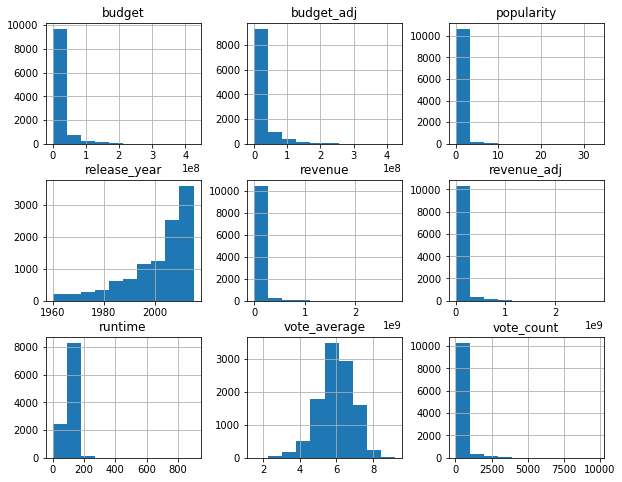

In [126]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis




### Are Movies with High Budget More Popular ?



> To Answer this question i folloed the following steps:
1. Fine the Average Budget 
2.Find The Budgets that are higher than the average
3.Find The Budgets that are lower than the average





In [127]:

avg_budget=df.budget.mean()
high_budget=df.budget>avg_budget
low_budget=df.budget<avg_budget



> 4.Clculate the popularity mean for the movies with high budget



In [128]:
df.popularity[high_budget].mean()


1.3152497125562082


5.Clculate the popularity mean for the movies with low budget




In [129]:
df.popularity[low_budget].mean()

0.40399253479623665



> 6.Plot the reasult using hist()



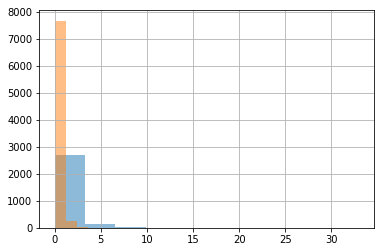

In [133]:
df.popularity[high_budget].hist(alpha=0.5,label='high')
df.popularity[low_budget].hist(alpha=0.5,label='low')


### Are Movies with  higher average votes has a better revenue ?



> To Answer this question i folloed the following steps:
1. Fine the Average of the vote 




In [134]:

votes=df.vote_average.round()




> 2. groub the revenue by vote 
  





> 3.calculate the mean 
 





> 4.round the results 
  





> 5.plot the results using plot()




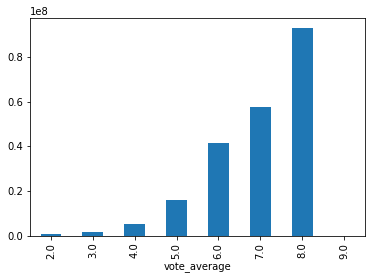

In [135]:
df.groupby(votes).revenue.mean().round().plot(kind='bar')

<a id='conclusions'></a>
## Conclusions

> After the analysis we have found that the movies with a higher budget are more populer than the movies with a lower budget , as for the second question we have found that the movies with a higher average vote has a higher revenue compared to lower rated movies.

